In [2]:
pip install git+https://github.com/Desklop/Uk_Stemmer

  Cloning https://github.com/Desklop/Uk_Stemmer to /tmp/pip-req-build-ellvezg7
  Running command git clone -q https://github.com/Desklop/Uk_Stemmer /tmp/pip-req-build-ellvezg7
  Created wheel for uk-stemmer: filename=uk_stemmer-1.0-py3-none-any.whl size=9512 sha256=8729516ea3d03792f7fbfc38d40ba4d7effeb6e6d25647d5377798bfa98bfc0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-53nuifct/wheels/40/53/2f/982431dc2aff61a4eb52a030950bbbdef0d9178114373d6c0e
Successfully built uk-stemmer


In [3]:
pip install spark-nlp==3.4.0

     |████████████████████████████████| 140 kB 5.3 MB/s 


In [4]:
pip install pyspark==3.0.2

     |████████████████████████████████| 204.8 MB 58 kB/s 
     |████████████████████████████████| 198 kB 50.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186690 sha256=f58742fd37df99cebbd3f34ad26abf6dfe093eb451624c3c9bb75eaa973630d6
  Stored in directory: /root/.cache/pip/wheels/9a/39/f6/970565f38054a830e9a8593f388b36e14d75dba6c6fdafc1ec
Successfully built pyspark


In [5]:
pip install nlu pyspark==3.0.2

     |████████████████████████████████| 478 kB 5.0 MB/s 
     |████████████████████████████████| 133 kB 57.7 MB/s 
  Attempting uninstall: spark-nlp
    Found existing installation: spark-nlp 3.4.0
    Uninstalling spark-nlp-3.4.0:
      Successfully uninstalled spark-nlp-3.4.0


In [6]:
!pip install pyenchant

     |████████████████████████████████| 55 kB 2.6 MB/s 


In [7]:
!apt-get install libenchant1c2a

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,312 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [13.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libaspell15 amd64 0.60.7~20110707-4ubuntu0.2 [310 kB]
Get:3 http://a

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from uk_stemmer import UkStemmer

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from sparknlp.base import *
from sparknlp.annotator import *
from sparknlp.pretrained import PretrainedPipeline
import sparknlp

In [11]:
import nlu

In [12]:
import enchant
from sklearn.metrics.pairwise import cosine_similarity
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(suppress=True)
nltk.download('stopwords')
nltk.download('punkt')
random_state = 8080

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
ls

drive/  sample_data/


In [16]:
df = pd.read_csv("/content/drive/MyDrive/full_data.csv")

In [17]:
df.head()

,crm_customer_id,created,NAME_LOWEST
0,50081964,2021-01-25 14:21:07.610,Петлі меблеві
1,50081964,2021-01-25 14:21:07.610,Петлі меблеві
2,50081964,2021-01-29 13:53:52.920,Лотки для столових приборів
3,50081964,2021-05-31 12:21:22.080,Інсектициди
4,50081964,2021-02-20 15:02:06.730,Рейлінги для кухні


In [18]:
df.columns = ["customer_id", "date", "category"]

In [19]:
df.head(2)

,customer_id,date,category
0,50081964,2021-01-25 14:21:07.610,Петлі меблеві
1,50081964,2021-01-25 14:21:07.610,Петлі меблеві


In [20]:
df.shape

(1412105, 3)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412105 entries, 0 to 1412104
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   customer_id  1412105 non-null  int64 
 1   date         1412105 non-null  object
 2   category     1412105 non-null  object
dtypes: int64(1), object(2)
memory usage: 32.3+ MB


In [22]:
print(f"number of categories: {df.category.nunique()}")

number of categories: 2129


In [23]:
print(f"number of customers: {df.customer_id.nunique()}")

number of customers: 20114


# NLP feature engineering

1. make all words lowercase
2. remove stopwords
3. preform stemming

In [24]:
df.head()

,customer_id,date,category
0,50081964,2021-01-25 14:21:07.610,Петлі меблеві
1,50081964,2021-01-25 14:21:07.610,Петлі меблеві
2,50081964,2021-01-29 13:53:52.920,Лотки для столових приборів
3,50081964,2021-05-31 12:21:22.080,Інсектициди
4,50081964,2021-02-20 15:02:06.730,Рейлінги для кухні


In [25]:
df.category.unique()[:20]

array(['Петлі меблеві', 'Лотки для столових приборів', 'Інсектициди',
       'Рейлінги для кухні', 'Алюмінієвий профіль', 'Стопори дверні',
       'Зубна паста', 'Куточок алюмінієвий', 'Мішки для сміття',
       'Господарчі рукавички', 'Серветки для прибирання',
       'Аератори для крана', 'Засоби для ванних кімнат', 'Швабри',
       'Засоби для кухні', 'Засоби для догляду за унітазом',
       'Клей побутовий', 'Губки господарчі', 'Пральний порошок',
       'Клей для шпалер'], dtype=object)

In [26]:
ndf = df.drop_duplicates(subset=["customer_id", "category"])

In [27]:
print(f"distinct records: {round((ndf.shape[0] * 100) / df.shape[0])}%")

distinct records: 38%


In [28]:
ndf["category"] = ndf["category"].str.lower()

In [29]:
ndf.head()

,customer_id,date,category
0,50081964,2021-01-25 14:21:07.610,петлі меблеві
2,50081964,2021-01-29 13:53:52.920,лотки для столових приборів
3,50081964,2021-05-31 12:21:22.080,інсектициди
4,50081964,2021-02-20 15:02:06.730,рейлінги для кухні
6,50081964,2021-02-20 15:02:06.730,алюмінієвий профіль


In [30]:
sum(ndf.category.str.isnumeric())

0

In [31]:
categories = ndf.category.unique()

In [32]:
categories

array(['петлі меблеві', 'лотки для столових приборів', 'інсектициди', ...,
       'насоси для фонтанів', 'композитний профіль', 'дитячі шезлонги'],
      dtype=object)

In [34]:
for category in categories:
    processed_category = [word for word in word_tokenize(category)
                              if (word not in stopwords.words("ukrainian")) and word.isalpha()]
    ndf.loc[ndf["category"] == category, "category"] = ' '.join(processed_category)

In [35]:
ndf.head()

,customer_id,date,category
0,50081964,2021-01-25 14:21:07.610,петлі меблеві
2,50081964,2021-01-29 13:53:52.920,лотки столових приборів
3,50081964,2021-05-31 12:21:22.080,інсектициди
4,50081964,2021-02-20 15:02:06.730,рейлінги кухні
6,50081964,2021-02-20 15:02:06.730,алюмінієвий профіль


In [36]:
categories

array(['петлі меблеві', 'лотки для столових приборів', 'інсектициди', ...,
       'насоси для фонтанів', 'композитний профіль', 'дитячі шезлонги'],
      dtype=object)

In [37]:
categories = pd.Series(categories)
categories

0                                          петлі меблеві
1                            лотки для столових приборів
2                                            інсектициди
3                                     рейлінги для кухні
4                                    алюмінієвий профіль
                              ...                       
2124                                  домашні кінотеатри
2125    зарядні пристрої та блоки живлення для ноутбуків
2126                                 насоси для фонтанів
2127                                 композитний профіль
2128                                     дитячі шезлонги
Length: 2129, dtype: object

In [38]:
categories.shape

(2129,)

In [39]:
lemma_categories = nlu.load('uk.lemma').predict(categories, output_level='document')

lemma download started this may take some time.
Approximate size to download 2.3 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [40]:
lemma_categories.rename({"document": "category"}, axis=1, inplace=True)

In [41]:
lemma_categories.head()

,category,lem
0,петлі меблеві,"[петля, меблеві]"
1,лотки для столових приборів,"[лотки, для, столовий, приборів]"
2,інсектициди,[інсектициди]
3,рейлінги для кухні,"[рейлінги, для, кухня]"
4,алюмінієвий профіль,"[алюмінієвий, профіль]"


In [42]:
ndf.head()

,customer_id,date,category
0,50081964,2021-01-25 14:21:07.610,петлі меблеві
2,50081964,2021-01-29 13:53:52.920,лотки столових приборів
3,50081964,2021-05-31 12:21:22.080,інсектициди
4,50081964,2021-02-20 15:02:06.730,рейлінги кухні
6,50081964,2021-02-20 15:02:06.730,алюмінієвий профіль


In [43]:
ndf = ndf.merge(lemma_categories, on="category")

In [44]:
ndf

,customer_id,date,category,lem
0,50081964,2021-01-25 14:21:07.610,петлі меблеві,"[петля, меблеві]"
1,50171691,2021-02-17 13:51:00.350,петлі меблеві,"[петля, меблеві]"
2,1600035308,2021-05-09 14:28:16.517,петлі меблеві,"[петля, меблеві]"
3,2000001033,2020-10-17 14:38:24.470,петлі меблеві,"[петля, меблеві]"
4,2000001042,2021-04-20 19:50:38.070,петлі меблеві,"[петля, меблеві]"
...,...,...,...,...
337538,33000053565,2020-10-31 10:45:18.427,спортивні лави,"[спортивний, лава]"
337539,33000056666,2021-09-15 09:38:11.600,ковані хвіртки,"[кований, хвіртка]"
337540,33000074608,2021-05-09 13:18:15.007,домашні кінотеатри,"[домашній, кінотеатр]"
337541,45002082643,2021-06-29 17:45:13.720,композитний профіль,"[композитний, профіль]"


In [45]:
customers_queries = ndf.set_index(["customer_id", "date"]).drop("category", axis=1)

In [46]:
customers_queries.head()["lem"].tolist()

[['петля', 'меблеві'],
 ['петля', 'меблеві'],
 ['петля', 'меблеві'],
 ['петля', 'меблеві'],
 ['петля', 'меблеві']]

In [47]:
customers_vs_queries = pd.DataFrame(customers_queries["lem"].tolist(), index=ndf.customer_id).stack().reset_index().pivot_table(index="customer_id", columns=0, fill_value=0, aggfunc='size')

In [48]:
customers_vs_queries.head()

,bis,iгрові,lego,аварійний,авто,автоакустика,автодиагностики,автозапчастини,автокрісла,автомагнітоли,автомат,автоматика,автоматичний,автомобіль,автомобільний,автопилососи,автосигналізації,автотермометри,автотехнікс,автофарба,автохолодильники,автошампуні,автошини,агроволокно,адміністративний,аератори,аерозольні,акварельні,аквашузи,акрилові,аксесуари,аксесуарів,активний,акумулятори,акумуляторні,алмазна,алмазного,алмазні,алюмінієвий,анкери,...,шпаклівка,шпалери,шпателі,шпатлівка,штангенциркулі,штани,штемпельна,штора,штроборізи,штукатурка,штукатурні,штучний,шумовіброізоляція,шумівки,шурупи,шуруповерти,щебінь,щит,щоденник,щітки,ягода,яйцерізки,ємність,іграшка,ігровий,ізоляційні,ізоляція,інвентар,інвертори,індексні,індивідуальний,індикатор,іноземний,інсектициди,інсталяції,інструмент,інтерактивні,інформаційний,інфрачервоні,ґрунтовка
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50081964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
50095759,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50097247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
50113709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50116694,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
customers_vs_queries[customers_vs_queries > 0] = 1

In [50]:
customers_vs_queries.describe()

,bis,iгрові,lego,аварійний,авто,автоакустика,автодиагностики,автозапчастини,автокрісла,автомагнітоли,автомат,автоматика,автоматичний,автомобіль,автомобільний,автопилососи,автосигналізації,автотермометри,автотехнікс,автофарба,автохолодильники,автошампуні,автошини,агроволокно,адміністративний,аератори,аерозольні,акварельні,аквашузи,акрилові,аксесуари,аксесуарів,активний,акумулятори,акумуляторні,алмазна,алмазного,алмазні,алюмінієвий,анкери,...,шпаклівка,шпалери,шпателі,шпатлівка,штангенциркулі,штани,штемпельна,штора,штроборізи,штукатурка,штукатурні,штучний,шумовіброізоляція,шумівки,шурупи,шуруповерти,щебінь,щит,щоденник,щітки,ягода,яйцерізки,ємність,іграшка,ігровий,ізоляційні,ізоляція,інвентар,інвертори,індексні,індивідуальний,індикатор,іноземний,інсектициди,інсталяції,інструмент,інтерактивні,інформаційний,інфрачервоні,ґрунтовка
count,"20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00",...,"20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00","20,066.00"
mean,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.22,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.01,0.03,0.03,0.00,0.08,0.00,0.00,0.01,0.02,0.00,0.02,0.02,0.01,0.00,0.00,0.03,0.02,0.05,...,0.08,0.12,0.11,0.01,0.00,0.00,0.00,0.08,0.00,0.05,0.03,0.03,0.02,0.01,0.14,0.01,0.00,0.00,0.03,0.05,0.00,0.00,0.06,0.02,0.08,0.09,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.03,0.01,0.00,0.00,0.11
std,0.04,0.01,0.12,0.11,0.06,0.02,0.01,0.01,0.06,0.01,0.04,0.03,0.18,0.15,0.42,0.04,0.01,0.02,0.01,0.17,0.02,0.16,0.12,0.17,0.17,0.03,0.27,0.07,0.02,0.08,0.16,0.01,0.12,0.15,0.07,0.03,0.01,0.18,0.15,0.21,...,0.27,0.32,0.32,0.09,0.06,0.04,0.04,0.28,0.01,0.21,0.17,0.17,0.15,0.09,0.34,0.12,0.06,0.06,0.17,0.23,0.06,0.06,0.24,0.13,0.27,0.29,0.15,0.08,0.05,0.09,0.02,0.02,0.01,0.16,0.05,0.17,0.09,0.01,0.06,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [ ]:
customers_vs_queries.to_csv("/content/drive/MyDrive/customers_vs_queries.csv")

In [51]:
docs = list(pd.Series(ndf.lem.astype(str).unique()).apply(lambda x: x[1:-1].replace("'", "").split(', ')).values)

In [52]:
dictionary = Dictionary(docs)

In [53]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [54]:
corpus[:10]

[[(0, 1), (1, 1)],
 [(2, 1)],
 [(3, 1), (4, 1)],
 [(5, 1), (6, 1)],
 [(7, 1), (8, 1)],
 [(3, 1), (9, 1)],
 [(10, 1), (11, 1)],
 [(12, 1)],
 [(13, 1), (14, 1)],
 [(10, 1), (15, 1)]]

In [55]:
tfidf = TfidfModel(corpus)

In [95]:
[corpora for corpora in corpus][:10]

[[(0, 1), (1, 1)],
 [(2, 1)],
 [(3, 1), (4, 1)],
 [(5, 1), (6, 1)],
 [(7, 1), (8, 1)],
 [(3, 1), (9, 1)],
 [(10, 1), (11, 1)],
 [(12, 1)],
 [(13, 1), (14, 1)],
 [(10, 1), (15, 1)]]

In [57]:
tfidf_weights = pd.DataFrame(tfidf[corpus[0]])
for corpora in corpus:
  tfidf_weights = tfidf_weights.append(pd.DataFrame(tfidf[corpora]), ignore_index=True) 

tfidf_weights

,0,1
0,0,0.64
1,1,0.77
2,0,0.64
3,1,0.77
4,2,1.00
...,...,...
2100,1267,0.80
2101,4,0.65
2102,1268,0.76
2103,118,0.33


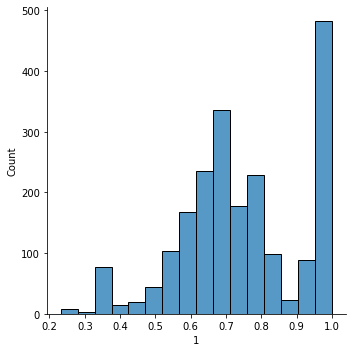

In [58]:
sns.displot(tfidf_weights.iloc[:, 1]);

In [59]:
(tfidf_weights.iloc[:, 1] < 1).value_counts()

True     1623
False     482
Name: 1, dtype: int64

In [60]:
tfidf[corpus[10]]

[(16, 0.6701241729302072), (17, 0.7422490100058105)]

In [61]:
corpus[4]

[(7, 1), (8, 1)]

In [62]:
print(dictionary[7], dictionary[8])

зубний паста


In [63]:
tfidf_weights.rename({0: "id", 1: "weight"}, axis=1, inplace=True)

In [64]:
tfidf_weights.head()

,id,weight
0,0,0.64
1,1,0.77
2,0,0.64
3,1,0.77
4,2,1.00


In [65]:
tfidf_weights = tfidf_weights.groupby("id").agg({"weight": ["max", "min", "mean"]}).reset_index()

In [66]:
tfidf_weights.head()

id weight          
        max  min mean
0  0   0.68 0.60 0.62
1  1   0.79 0.77 0.78
2  2   1.00 1.00 1.00
3  3   0.76 0.68 0.70
4  4   0.74 0.65 0.68

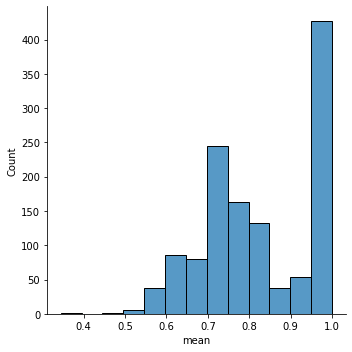

In [67]:
sns.displot(tfidf_weights["weight"]["mean"]);

In [68]:
tfidf_weights["id"] = tfidf_weights["id"].apply(lambda x: dictionary[x])

In [69]:
tfidf_weights.head()

id weight          
                  max  min mean
0      меблеві   0.68 0.60 0.62
1        петля   0.79 0.77 0.78
2  інсектициди   1.00 1.00 1.00
3  алюмінієвий   0.76 0.68 0.70
4      профіль   0.74 0.65 0.68

In [70]:
for category, weight in zip(tfidf_weights["id"], tfidf_weights["weight"]["mean"]):
  customers_vs_queries.loc[:, category] = (customers_vs_queries.loc[:, category] * weight)

In [71]:
customers_vs_queries.head()

,bis,iгрові,lego,аварійний,авто,автоакустика,автодиагностики,автозапчастини,автокрісла,автомагнітоли,автомат,автоматика,автоматичний,автомобіль,автомобільний,автопилососи,автосигналізації,автотермометри,автотехнікс,автофарба,автохолодильники,автошампуні,автошини,агроволокно,адміністративний,аератори,аерозольні,акварельні,аквашузи,акрилові,аксесуари,аксесуарів,активний,акумулятори,акумуляторні,алмазна,алмазного,алмазні,алюмінієвий,анкери,...,шпаклівка,шпалери,шпателі,шпатлівка,штангенциркулі,штани,штемпельна,штора,штроборізи,штукатурка,штукатурні,штучний,шумовіброізоляція,шумівки,шурупи,шуруповерти,щебінь,щит,щоденник,щітки,ягода,яйцерізки,ємність,іграшка,ігровий,ізоляційні,ізоляція,інвентар,інвертори,індексні,індивідуальний,індикатор,іноземний,інсектициди,інсталяції,інструмент,інтерактивні,інформаційний,інфрачервоні,ґрунтовка
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50081964,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.70,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50095759,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50097247,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.93
50113709,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50116694,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [72]:
user_to_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customers_vs_queries),
    index=customers_vs_queries.index,
    columns=customers_vs_queries.index
)

In [73]:
user_to_user_sim_matrix.head()

customer_id,50081964,50095759,50097247,50113709,50116694,50124346,50163389,50168245,50170083,50171691,50176842,50185742,800049993,800050418,800059359,1120154902,1120155204,1200032730,1200033892,1200034069,1200037122,1200042504,1200048313,1200048318,1200052047,1200053955,1200054648,1200084141,1200092862,1600035308,1600086288,1700046296,1700058131,1700061013,2000001015,2000001023,2000001033,2000001042,2000001056,2000001057,...,85100263106,85100264782,85100268956,85100269632,85100271369,85100271538,85100272974,85100273081,85100276796,85100276802,85100277631,85100279283,85100281367,85100281710,85100282133,85100282466,85100283851,85100284878,85100286893,85100287444,85100288668,85100291905,85100292323,85100292427,85100292492,85100314905,85100315599,85100316264,85100316381,85100317816,85100320089,85100321783,85100322432,85100323252,85100325531,85100327278,85100328957,85100329243,85100329312,85100330032
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50081964,1.00,0.05,0.00,0.04,0.00,0.00,0.10,0.00,0.12,0.27,0.08,0.00,0.00,0.00,0.06,0.07,0.15,0.00,0.13,0.05,0.00,0.09,0.00,0.18,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.21,0.00,0.00,0.07,0.05,0.10,0.17,0.15,0.00,...,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.10,0.06,0.04,0.00,0.03,0.06,0.00,0.00,0.07,0.00,0.16,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.23,0.00,0.00,0.05,0.00,0.00,0.06,0.16,0.00,0.00,0.00,0.22,0.00,0.00
50095759,0.05,1.00,0.00,0.02,0.12,0.03,0.07,0.00,0.36,0.20,0.08,0.14,0.10,0.00,0.09,0.08,0.04,0.00,0.09,0.14,0.00,0.20,0.00,0.00,0.10,0.11,0.07,0.00,0.00,0.17,0.00,0.16,0.10,0.08,0.08,0.18,0.23,0.13,0.11,0.07,...,0.00,0.12,0.00,0.00,0.00,0.13,0.00,0.10,0.00,0.06,0.24,0.02,0.00,0.00,0.00,0.05,0.14,0.00,0.06,0.00,0.00,0.12,0.24,0.08,0.10,0.06,0.16,0.00,0.00,0.03,0.13,0.12,0.12,0.00,0.00,0.00,0.18,0.00,0.00,0.00
50097247,0.00,0.00,1.00,0.08,0.00,0.11,0.17,0.00,0.03,0.00,0.06,0.02,0.00,0.00,0.14,0.00,0.25,0.00,0.05,0.00,0.00,0.13,0.12,0.00,0.19,0.03,0.14,0.00,0.17,0.10,0.00,0.00,0.07,0.14,0.25,0.04,0.14,0.32,0.13,0.17,...,0.11,0.18,0.00,0.16,0.00,0.32,0.11,0.07,0.00,0.00,0.21,0.11,0.13,0.07,0.22,0.00,0.02,0.00,0.10,0.04,0.00,0.10,0.12,0.14,0.03,0.10,0.08,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.11,0.12,0.06,0.00,0.20,0.00
50113709,0.04,0.02,0.08,1.00,0.16,0.20,0.11,0.00,0.00,0.11,0.22,0.05,0.11,0.00,0.05,0.00,0.09,0.10,0.00,0.07,0.19,0.08,0.00,0.09,0.16,0.23,0.04,0.22,0.12,0.14,0.00,0.03,0.17,0.11,0.04,0.13,0.22,0.15,0.08,0.00,...,0.08,0.12,0.00,0.00,0.00,0.03,0.15,0.25,0.08,0.28,0.08,0.05,0.07,0.04,0.00,0.08,0.11,0.09,0.14,0.03,0.00,0.19,0.00,0.05,0.06,0.24,0.02,0.12,0.00,0.08,0.02,0.00,0.00,0.24,0.00,0.14,0.18,0.00,0.12,0.09
50116694,0.00,0.12,0.00,0.16,1.00,0.15,0.10,0.00,0.11,0.24,0.06,0.06,0.03,0.00,0.17,0.21,0.18,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.13,0.12,0.18,0.19,0.18,0.14,0.00,0.00,0.00,0.21,0.12,0.03,0.15,0.08,0.14,0.00,...,0.00,0.19,0.00,0.05,0.00,0.02,0.11,0.07,0.00,0.14,0.00,0.06,0.11,0.00,0.17,0.14,0.00,0.14,0.14,0.00,0.00,0.09,0.00,0.00,0.12,0.15,0.23,0.20,0.00,0.11,0.04,0.06,0.00,0.08,0.00,0.20,0.09,0.00,0.03,0.19


In [85]:
user_to_user_sim_matrix.iloc[0].sort_values(ascending=False)

customer_id
50081964      1.00
33000030393   0.44
45002172157   0.43
19000031041   0.43
2000010608    0.42
              ... 
19000107828   0.00
19000107793   0.00
19000107747   0.00
19000107745   0.00
19000074125   0.00
Name: 50081964, Length: 20066, dtype: float64

In [75]:
def compare_customers(customers: list, df: pd.DataFrame) -> None:
  sns.countplot(data=df[df["customer_id"].isin(customers)], y="category", hue="customer_id");

In [91]:
def find_intersection(customer_id_1: int, customer_id_2: int, df: pd.DataFrame) -> None:
  customer_1 = df[df["customer_id"] == customer_id_1]["category"] 
  customer_2 = df[df["customer_id"] == customer_id_2]["category"]
  print(pd.Series(np.intersect1d(customer_1.values, customer_2.values)))

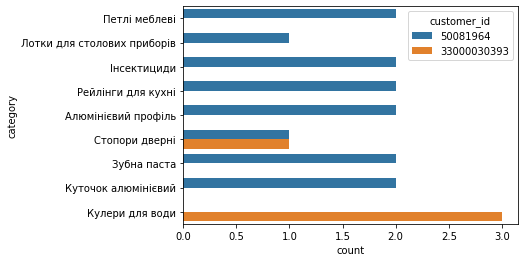

In [82]:
compare_customers([50081964, 33000030393], df)

In [92]:
find_intersection(50081964, 33000030393, df)

0    Стопори дверні
dtype: object


In [84]:
user_to_user_sim_matrix.iloc[10].sort_values(ascending=False)

customer_id
50176842      1.00
2000028459    0.40
19000032529   0.39
19000035170   0.39
33000036091   0.39
              ... 
2000077180    0.00
19000123944   0.00
19000073246   0.00
2000077314    0.00
19000102210   0.00
Name: 50176842, Length: 20066, dtype: float64

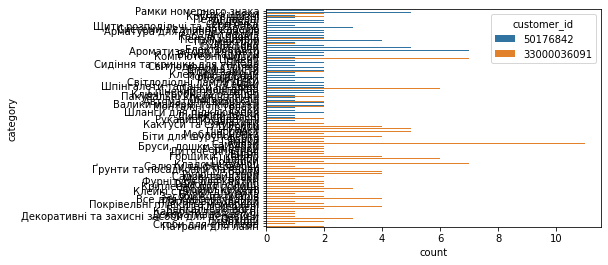

In [88]:
compare_customers([50176842, 33000036091], df)

In [93]:
find_intersection(50176842, 33000036091, df)

0          Автоматичні вимикачі
1                Круги відрізні
2                       Мастика
3            Монтажні пістолети
4     Пакувальні клейкі стрічки
5                Пензлі малярні
6                 Піна монтажна
7           Рукавиці будівельні
8                   Рідкі цвяхи
9                 Сітки захисні
10                       Цемент
dtype: object
